# Cylindrical compressive test

In [1]:
from ibvpy.bcond import BCSlice
from ibvpy.fets import FETS3D8H
from ibvpy.tmodel.mats3D import MATS3DElastic
from bmcs_matmod.ms1.ms1 import MS13D
import bmcs_matmod.ms1.concrete_material_db as mp_db
from ibvpy.tmodel.viz3d_scalar_field import \
    Vis3DStateField, Viz3DScalarField
from ibvpy.tmodel.viz3d_tensor_field import \
    Vis3DTensorField, Viz3DTensorField
from mayavi import mlab
from ibvpy.sim.tstep_bc import TStepBC
from ibvpy.xmodel.xdomain_fe_grid import XDomainFEGrid

import numpy as np

In [2]:
from bmcs_expsim.utils.mlab_decorators import decorate_figure

**Check the material parameters** of C40 concrete matrix

In [3]:
mp_db.C40MS1

{'E': 37000.0,
 'nu': 0.2,
 'Ad': 800.0,
 'eps_0': 7e-05,
 'K_N': 14000.0,
 'sigma_N_0': 25.0,
 'gamma_N': 5000.0,
 'sigma_T_0': 2.2,
 'K_T': 1200.0,
 'gamma_T': 65000,
 'S_T': 0.0025,
 'c_T': 8.7,
 'r_T': 9.2,
 'm_T': 0.001,
 'p_T': 7.5}

In [4]:
xmodel = XDomainFEGrid(coord_min=(0,0,0),
                     coord_max=(1,1, 1),
                     shape=(1, 1, 1),
                     integ_factor=1,
                     fets=FETS3D8H())

In [5]:
tmodel = MS13D(**mp_db.C40MS1)
#tmodel = MATS3DElastic(E=1, nu=0)

In [6]:
w_max = -1e-2
#w_max = -1
bc_l_x = BCSlice(slice=xmodel.mesh[0, :, :, 0, :, :],
                  var='u', dims=[0], value=0.0)
bc_r_x = BCSlice(slice=xmodel.mesh[-1, :, :, -1, :, :],
                 var='u', dims=[0], value=w_max)
bc_xy_z0 = BCSlice(slice=xmodel.mesh[:, :, 0, :, :, 0],
                  var='u', dims=[2], value=0)
bc_xz_y0 = BCSlice(slice=xmodel.mesh[:, 0, :, :, 0, :],
                 var='u', dims=[1], value=0)


In [7]:
m = TStepBC(
    domains=[(xmodel, tmodel)],
    bc=[bc_l_x, bc_r_x, bc_xy_z0, bc_xz_y0] # , bc_r_y],
)

m.hist.vis_record = {
    'strain': Vis3DTensorField(var='eps_ab'),
    # 'stress': Vis3DTensorField(var='sig_ab'),
    #        'damage': Vis3DStateField(var='omega_a'),
    #        'kinematic hardening': Vis3DStateField(var='z_a')
}


In [8]:
w_steps = 20
s = m.sim
s.tloop.k_max = 1000
s.tline.step = 1 / w_steps
s.tloop.verbose = True
s.run()

VAR
eps_ab
DOMAIN
{'eps_ab': <bound method MATSXDEval.get_eps_ab of <bmcs_matmod.ms1.ms1.MS13D object at 0x7f19f7765db0>>, 'sig_ab': <bound method MATSXDEval.get_sig_ab of <bmcs_matmod.ms1.ms1.MS13D object at 0x7f19f7765db0>>}
t:	 0.00corrected version
corrected version
(0), 
	 0.05corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
(3), 
	 0.10corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
(6), 
	 0.15corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected version
corrected

In [9]:
F_to = m.hist.F_t
U_to = m.hist.U_t

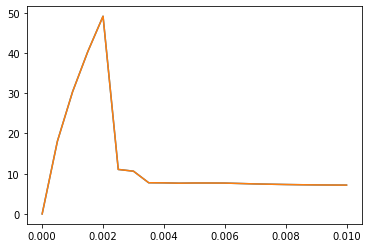

In [10]:
F_l_t = np.sum(F_to[:, bc_l_x.dofs], axis=-1)
F_r_t = np.sum(F_to[:, bc_r_x.dofs], axis=-1)
U_r_t = np.average(U_to[:, bc_r_x.dofs], axis=-1)

import matplotlib.pylab as plt
plt.plot(-U_r_t, -F_r_t)
plt.plot(-U_r_t, F_l_t)